**1. Import libraries**

In [1]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import string

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

**2. Load datasets**

In [3]:
df_training=pd.read_csv('sample_data/mnist_train_small.csv')
print(df_training.shape)
print(df_training.dtypes)

df_testing=pd.read_csv('sample_data/mnist_test.csv')
print(df_testing.shape)
print(df_testing.dtypes)

#Images of 28x28=784
#Column 0 = Labels

(19999, 785)
6        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.586    int64
0.587    int64
0.588    int64
0.589    int64
0.590    int64
Length: 785, dtype: object
(9999, 785)
7        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.663    int64
0.664    int64
0.665    int64
0.666    int64
0.667    int64
Length: 785, dtype: object


**3. Review image features and visualize it**


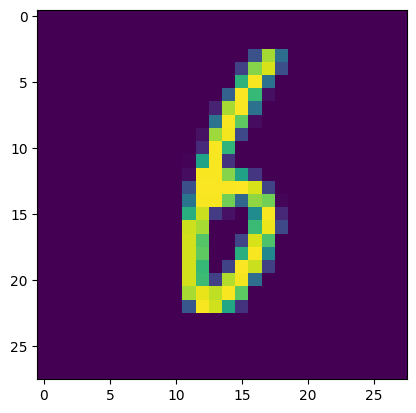

Shape summary:  (28, 28)
Height:  28
Width:  28
Type:  float32


In [4]:
#Features of an image
rand_image=18

image = df_training.iloc[rand_image,1:].values
image = image.reshape((28,28)).astype('float32')

plt.imshow(image)
plt.show()

print("Shape summary: ",image.shape)
print("Height: ",image.shape[0])
print("Width: ",image.shape[1])
print("Type: ",image.dtype)

#We can see the color mode of the image is RGB, so we will require to use at least 3 channels
#-Grayscale - 1 channel
#-RGB - 3 channels

**4. Preprocess images (Normalize)**

In [12]:
array_training = df_training.to_numpy()
array_testing = df_testing.to_numpy()

X_train=array_training[:,1:]
y_train=array_training[:,0]

X_test=array_testing[:,1:]
y_test=array_testing[:,0]

images_train=[]
for img in X_train:
  img=img/255
  images_train.append(img)

images_test=[]
for img in X_test:
  img=img/255
  images_test.append(img)

X_train = np.array(images_train)
X_test = np.array(images_test)

X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
# print(X_train[0])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19999, 28, 28, 1)
(19999,)
(9999, 28, 28, 1)
(9999,)


**7. Model Creation - CNN**

In [33]:
input = layers.Input(shape=(X_train.shape[1],X_train.shape[2],1))    #(28,28,1)

x = layers.Conv2D(32, (3, 3), activation='relu')(input)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output1 = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=input, outputs=output1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])




**8. Model Training**

In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7489 - loss: 0.7832 - val_accuracy: 0.9596 - val_loss: 0.1297
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9562 - loss: 0.1386 - val_accuracy: 0.9713 - val_loss: 0.0908
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.9744 - loss: 0.0792 - val_accuracy: 0.9712 - val_loss: 0.0883
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9797 - loss: 0.0602 - val_accuracy: 0.9792 - val_loss: 0.0698
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9853 - loss: 0.0482 - val_accuracy: 0.9749 - val_loss: 0.0879
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9735 - val_loss: 0.0817
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.9897 - loss: 0.0310 - val_accuracy: 0.9796 - val_loss: 0.0727
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9902 - loss: 0.0266 - 

**9. Evaluate the Model**

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9692 - loss: 0.1148
Loss: 0.09095373004674911, Accuracy: 0.9765976667404175


**10. Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


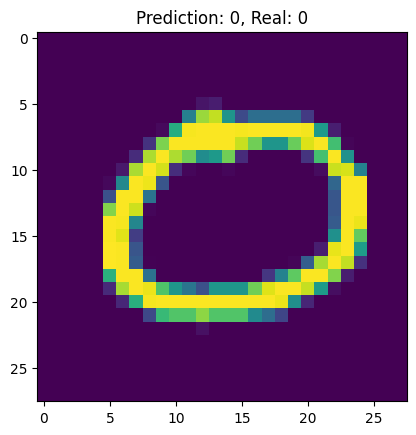

In [37]:
rand_image=68
predictions = model.predict(X_test)

plt.imshow(X_test[rand_image].reshape(28, 28))
plt.title(f'Prediction: {predictions[rand_image].argmax()}, Real: {y_test[rand_image]}')
plt.show()